In [ ]:
#ATIVIDADE Porto Seguro Data Challenge
#Igor
#Luan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
submission_sample = pd.read_csv('databases/submission_sample.csv')
test = pd.read_csv('databases/test.csv')
train = pd.read_csv('databases/train.csv')
metadata = pd.read_csv('databases/metadata.csv')

In [3]:
train.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,...,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,...,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,...,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,...,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


In [4]:
# Dividindo dataset Train em X e Y

In [5]:
train_x = train.loc[:, train.columns != 'y']
train_y = train['y']

In [6]:
#Balanciando os dados em X e Y

In [8]:
balancing = SMOTE()
x_balancing, y_balancing =  balancing.fit_resample(train_x,train_y)

In [9]:
#verificando os dados balaciando em X

In [10]:
x_balancing.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,1,18,19,2853,29442,1386,2435,35,-999,3,...,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706
1,8,4,110,1986,13684,7189,-999,-999,17,3,...,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618
2,30,0,39,1019,10232,678,791,16,-999,3,...,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647
3,43,20,39,1751,2689,8235,1042,13,10,1,...,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353
4,46,7,44,2262,29428,6031,304,16,-999,3,...,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353


In [11]:
#Verificando os dados balanciados em Y

In [12]:
y_balancing.head()

0    1
1    0
2    0
3    0
4    1
Name: y, dtype: int64

In [13]:
#separando os dados desbalanciado entre 80 para treino e 20 para teste

In [14]:
x_train_desbl, x_train_test_desbl, y_train_desbl,y_train_test_desbl = train_test_split(
    train_x, 
    train_y,
    test_size = 0.20,
    shuffle = True,
    random_state= 42
)

In [15]:
#separando os dados Balanciados entre 80 para treino e 20 para teste

In [16]:
x_train_bl, x_train_test_bl, y_train_bl,y_train_test_bl = train_test_split(
    x_balancing, 
    y_balancing,
    test_size = 0.20,
    shuffle = True,
    random_state= 42
)

In [17]:
#----------------------------------------------------------------------------------------------------------

In [18]:
#UTILIZANDO 3 MODELOS PARA OS DADOS DESBANLACIADOS

In [19]:
# Utilizando Modelo - Decision Trees

In [20]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_desbl,y_train_desbl)

In [21]:
#fazendo a predict dos dados

In [22]:
y_pred =  clf.predict(x_train_test_desbl)

In [23]:
#monstrando a precisao do algoritimo no predict

In [24]:
print(classification_report(y_train_test_desbl,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2228
           1       0.49      0.51      0.50       597

    accuracy                           0.79      2825
   macro avg       0.68      0.69      0.68      2825
weighted avg       0.79      0.79      0.79      2825



In [25]:
#gerando graficos 

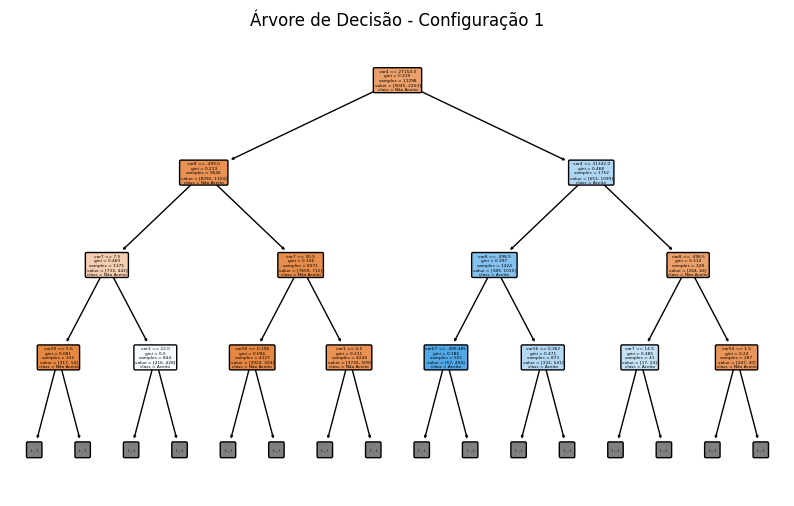

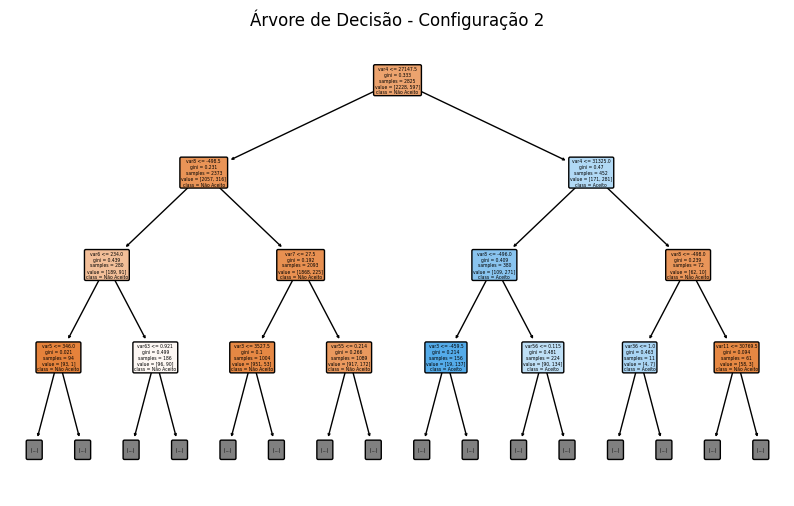

In [26]:
configuracoes = [
    ("Configuração 1", x_train_desbl, y_train_desbl),
    ("Configuração 2", x_train_test_desbl, y_train_test_desbl),
]

# Iterar sobre cada configuração e criar e mostrar a árvore de decisão correspondente
for nome_config, x_train, y_train in configuracoes:
    # Criar o classificador da árvore de decisão
    arvore_decisao = DecisionTreeClassifier()
    # Treinar a árvore de decisão
    arvore_decisao.fit(x_train, y_train)
    
    # Mostrar a árvore de decisão
    plt.figure(figsize=(10, 6))
    plot_tree(arvore_decisao, filled=True, rounded=True, class_names=["Não Aceito", "Aceito"], feature_names=train_x.columns, max_depth=3)
    plt.title(f"Árvore de Decisão - {nome_config}")
    plt.show()

In [27]:
#Modelo 2 - KNN

In [28]:
knn = KNeighborsClassifier()
knn.fit(x_train_desbl,y_train_desbl)

KNeighborsClassifier()

In [29]:
#monstrando a precisao do algoritimo no predict

In [30]:
y_pred = knn.predict(x_train_test_desbl)

In [31]:
#Monstrando a presicao do predic

In [32]:
print(classification_report(y_train_test_desbl, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2228
           1       0.57      0.38      0.45       597

    accuracy                           0.81      2825
   macro avg       0.71      0.65      0.67      2825
weighted avg       0.79      0.81      0.79      2825



In [33]:
#Monstrando grafico KNN

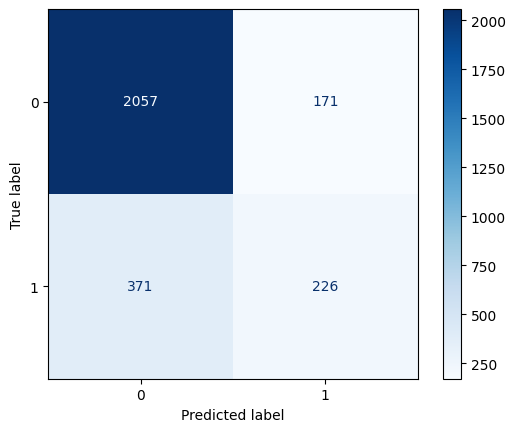

In [34]:
ConfusionMatrixDisplay.from_estimator(knn,x_train_test_desbl, y_train_test_desbl, cmap='Blues')

In [35]:
#Modelo 3 regression logistic

In [36]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_desbl, y_train_desbl)

C:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
#Fazendo o predict dos dados

In [38]:
y_pred = logistic_regression.predict(x_train_test_desbl)

In [39]:
#Monstrando a presicao do predic

In [40]:
print(classification_report(y_train_test_desbl, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2228
           1       0.68      0.36      0.47       597

    accuracy                           0.83      2825
   macro avg       0.76      0.66      0.68      2825
weighted avg       0.81      0.83      0.81      2825



In [41]:
#Calculando a curva do roc para o logisticRegression

In [42]:
fpr, tpr, thresholds = roc_curve(y_train_test_desbl, logistic_regression.predict_proba(x_train_test_desbl)[:,1])
roc_auc = auc(fpr, tpr)

In [43]:
# Plotando a curva do ROC

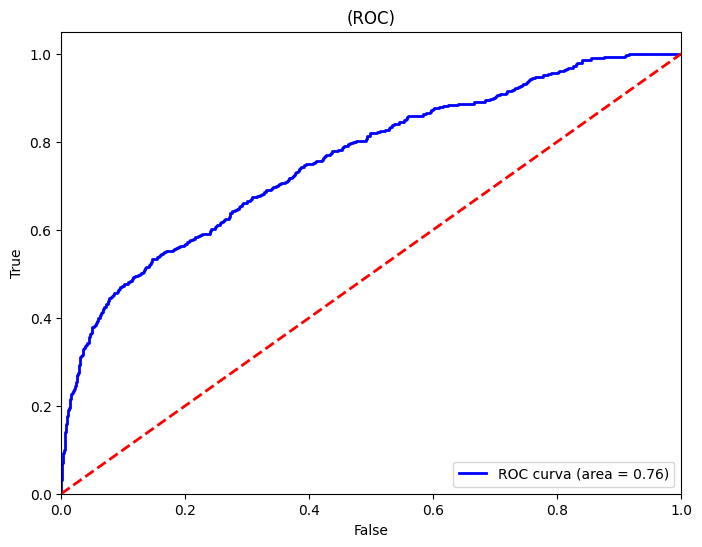

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curva (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False')
plt.ylabel('True')
plt.title('(ROC)')
plt.legend(loc="lower right")
plt.show()

In [45]:
#-----------------------------------------------------------------------------------------------------------------

In [46]:
#UTILIZANDO 3 MODELOS PARA OS DADOS BANLACIADOS

In [47]:
# Utilizando Modelo - Decision Trees

In [48]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_bl,y_train_bl)

In [49]:
#fazendo a predict dos dados

In [50]:
y_pred =  clf.predict(x_train_test_bl)

In [51]:
#monstrando a precisao do algoritimo no predict

In [52]:
print(classification_report(y_train_test_bl,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2237
           1       0.84      0.87      0.86      2273

    accuracy                           0.85      4510
   macro avg       0.85      0.85      0.85      4510
weighted avg       0.85      0.85      0.85      4510



In [53]:
#gerando graficos 

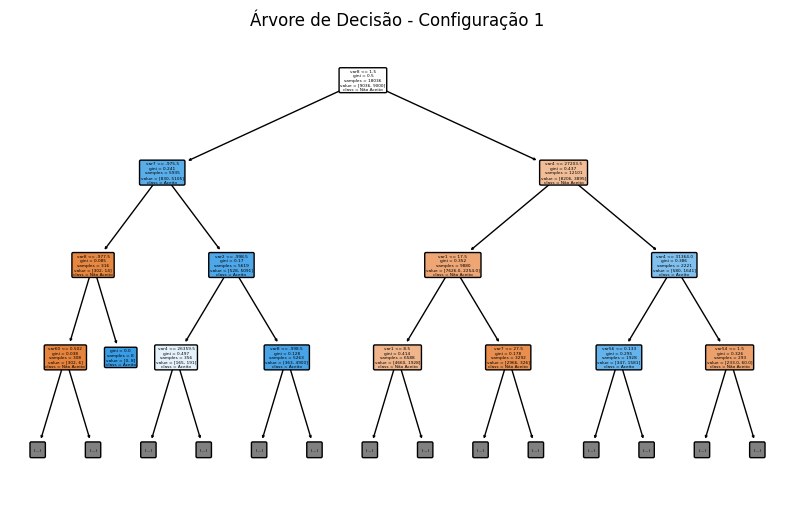

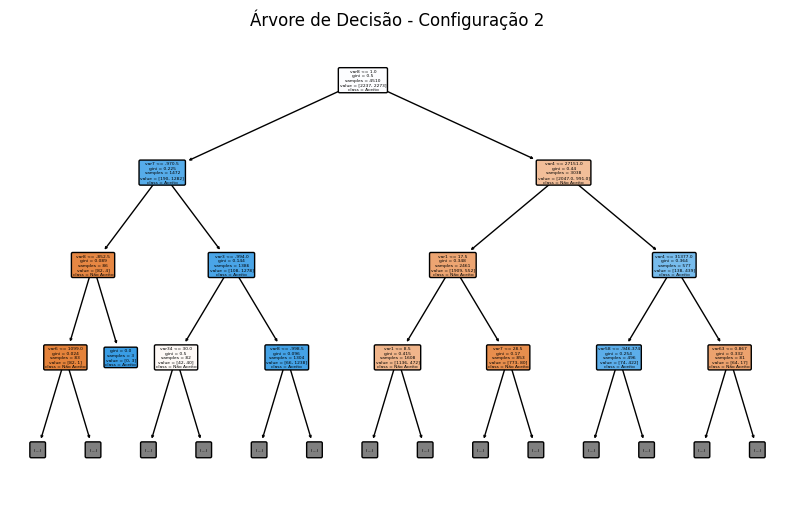

In [54]:
configuracoes = [
    ("Configuração 1", x_train_bl, y_train_bl),
    ("Configuração 2", x_train_test_bl, y_train_test_bl),
]

# Iterar sobre cada configuração e criar e mostrar a árvore de decisão correspondente
for nome_config, x_train, y_train in configuracoes:
    # Criar o classificador da árvore de decisão
    arvore_decisao = DecisionTreeClassifier()
    # Treinar a árvore de decisão
    arvore_decisao.fit(x_train, y_train)
    
    # Mostrar a árvore de decisão
    plt.figure(figsize=(10, 6))
    plot_tree(arvore_decisao, filled=True, rounded=True, class_names=["Não Aceito", "Aceito"], feature_names=train_x.columns, max_depth=3)
    plt.title(f"Árvore de Decisão - {nome_config}")
    plt.show()

In [55]:
#Modelo 2 - KNN

In [56]:
knn = KNeighborsClassifier()
knn.fit(x_train_bl,y_train_bl)

KNeighborsClassifier()

In [57]:
#monstrando a precisao do algoritimo no predict

In [58]:
print(classification_report(y_train_test_bl, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2237
           1       0.84      0.87      0.86      2273

    accuracy                           0.85      4510
   macro avg       0.85      0.85      0.85      4510
weighted avg       0.85      0.85      0.85      4510



In [59]:
#Monstrando grafico KNN

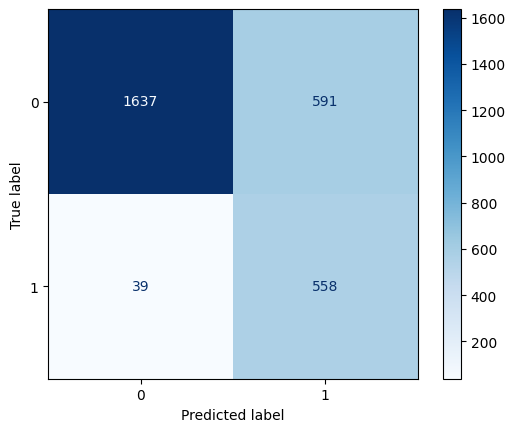

In [60]:
ConfusionMatrixDisplay.from_estimator(knn,x_train_test_desbl, y_train_test_desbl, cmap='Blues')

In [61]:
#Modelo 3 regression logistic

In [62]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_bl, y_train_bl)

C:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
#Fazendo o predict dos dados

In [69]:
y_pred = logistic_regression.predict(x_train_test_bl)

In [70]:
#Monstrando a presicao do predic

In [71]:
print(classification_report(y_train_test_bl, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2237
           1       0.79      0.71      0.75      2273

    accuracy                           0.76      4510
   macro avg       0.76      0.76      0.76      4510
weighted avg       0.76      0.76      0.76      4510



In [72]:
#Calculando a curva do roc para o logisticRegression

In [73]:
fpr, tpr, thresholds = roc_curve(y_train_test_bl, logistic_regression.predict_proba(x_train_test_bl)[:,1])
roc_auc = auc(fpr, tpr)

In [74]:
# Plotando a curva do ROC

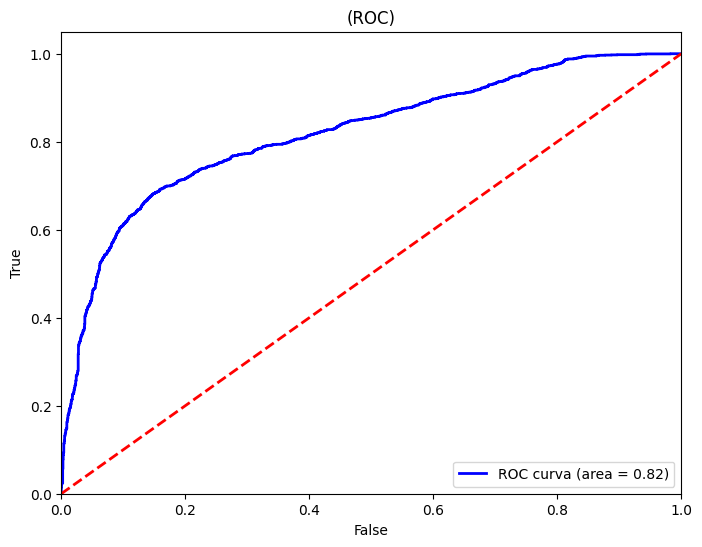

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curva (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False')
plt.ylabel('True')
plt.title('(ROC)')
plt.legend(loc="lower right")
plt.show()